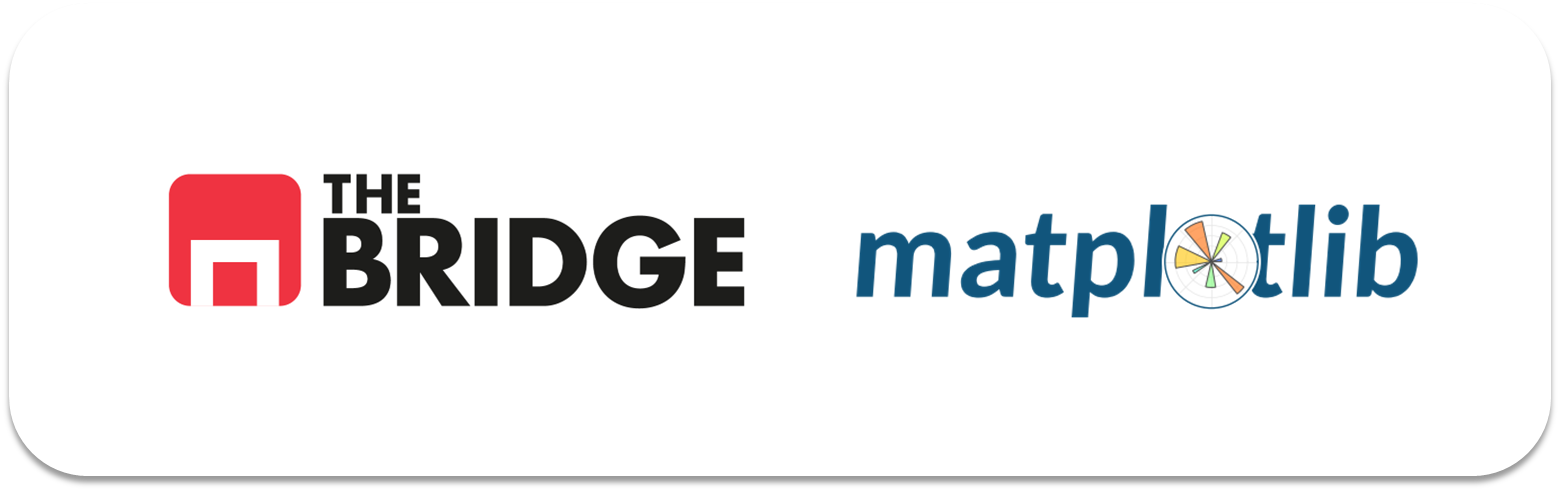

## PRACTICA OBLIGATORIA: VISUALIZACION BASICA

* La práctica obligatoria de esta unidad consiste en un único ejercicio de construcción de gráficas. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [290]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt 

plt.rcParams['text.usetex'] = False

## #1

### #1.1

Carga el dataset de casas de California que está en la ruta "./data/california_cities.csv". Muestra parte de su contenido y su descripción. Deshazte de las filas con nulos.

In [291]:
df_CasasCAlifornia = pd.read_csv("./data/california_cities.csv", index_col="Unnamed: 0")

In [292]:
df_CasasCAlifornia.dropna(how="any", inplace=True)

In [293]:
df_CasasCAlifornia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 427 entries, 0 to 481
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city                427 non-null    object 
 1   latd                427 non-null    float64
 2   longd               427 non-null    float64
 3   elevation_m         427 non-null    float64
 4   elevation_ft        427 non-null    float64
 5   population_total    427 non-null    int64  
 6   area_total_sq_mi    427 non-null    float64
 7   area_land_sq_mi     427 non-null    float64
 8   area_water_sq_mi    427 non-null    float64
 9   area_total_km2      427 non-null    float64
 10  area_land_km2       427 non-null    float64
 11  area_water_km2      427 non-null    float64
 12  area_water_percent  427 non-null    float64
dtypes: float64(11), int64(1), object(1)
memory usage: 46.7+ KB


### #1.2

Recrea la siguiente figura, para ello construye en apartados separados cada gráfico y luego haz un apartado en el que se junten los cuatro. Las figuras son:
1. Las ciudades más pobladas, con los numeros de las poblaciones (tendrás que usar texto y recordar que para centrarlos se necesita poner el argumento `ha` a "center"). (Colores: azul, gris, aceituna, marrón, con trasparencia)
2. Histograma del área total ocupada por las ciudades. (50 bins, fuente = "Bradley Hand itc", tamaño 18, color azul acero)
3. El scatter de área de agua de un ciudad con su poblacion.
4. El boxplot de la altura de las ciudades.

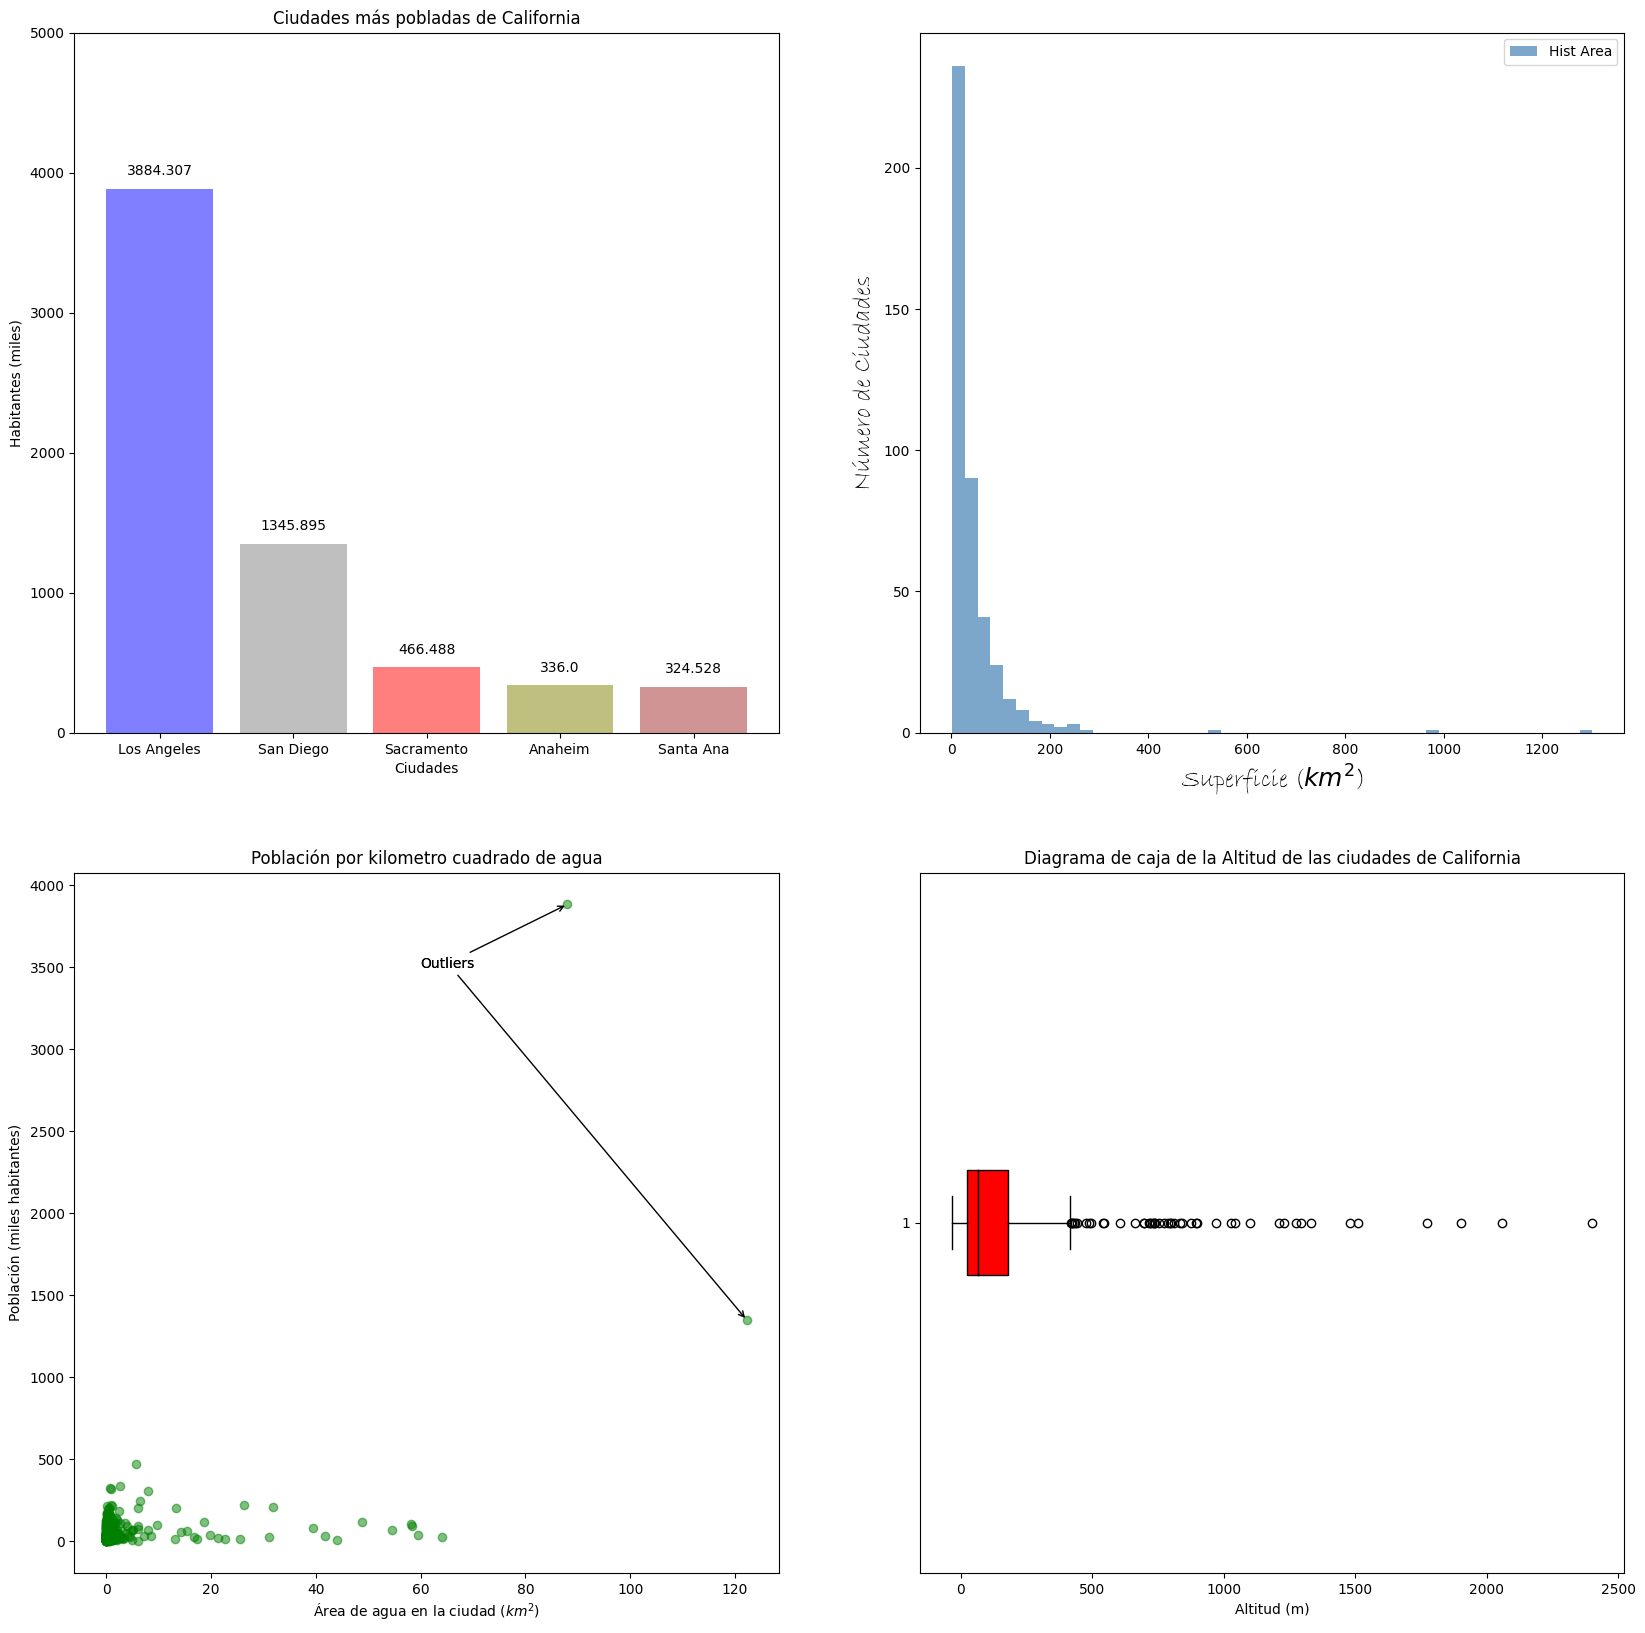

<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:18: SyntaxWarning: invalid escape sequence '\m'
/var/folders/cz/cnnldf8n7_9_gklt41tgbm380000gn/T/ipykernel_1117/4196116506.py:18: SyntaxWarning: invalid escape sequence '\m'
  ax[0, 1].set_xlabel('Superficie ($\mathbf{km^2}$)', family="Bradley Hand")
/var/folders/cz/cnnldf8n7_9_gklt41tgbm380000gn/T/ipykernel_1117/4196116506.py:18: SyntaxWarning: invalid escape sequence '\m'
  ax[0, 1].set_xlabel('Superficie ($\mathbf{km^2}$)', family="Bradley Hand")


ValueError: too many values to unpack (expected 2)

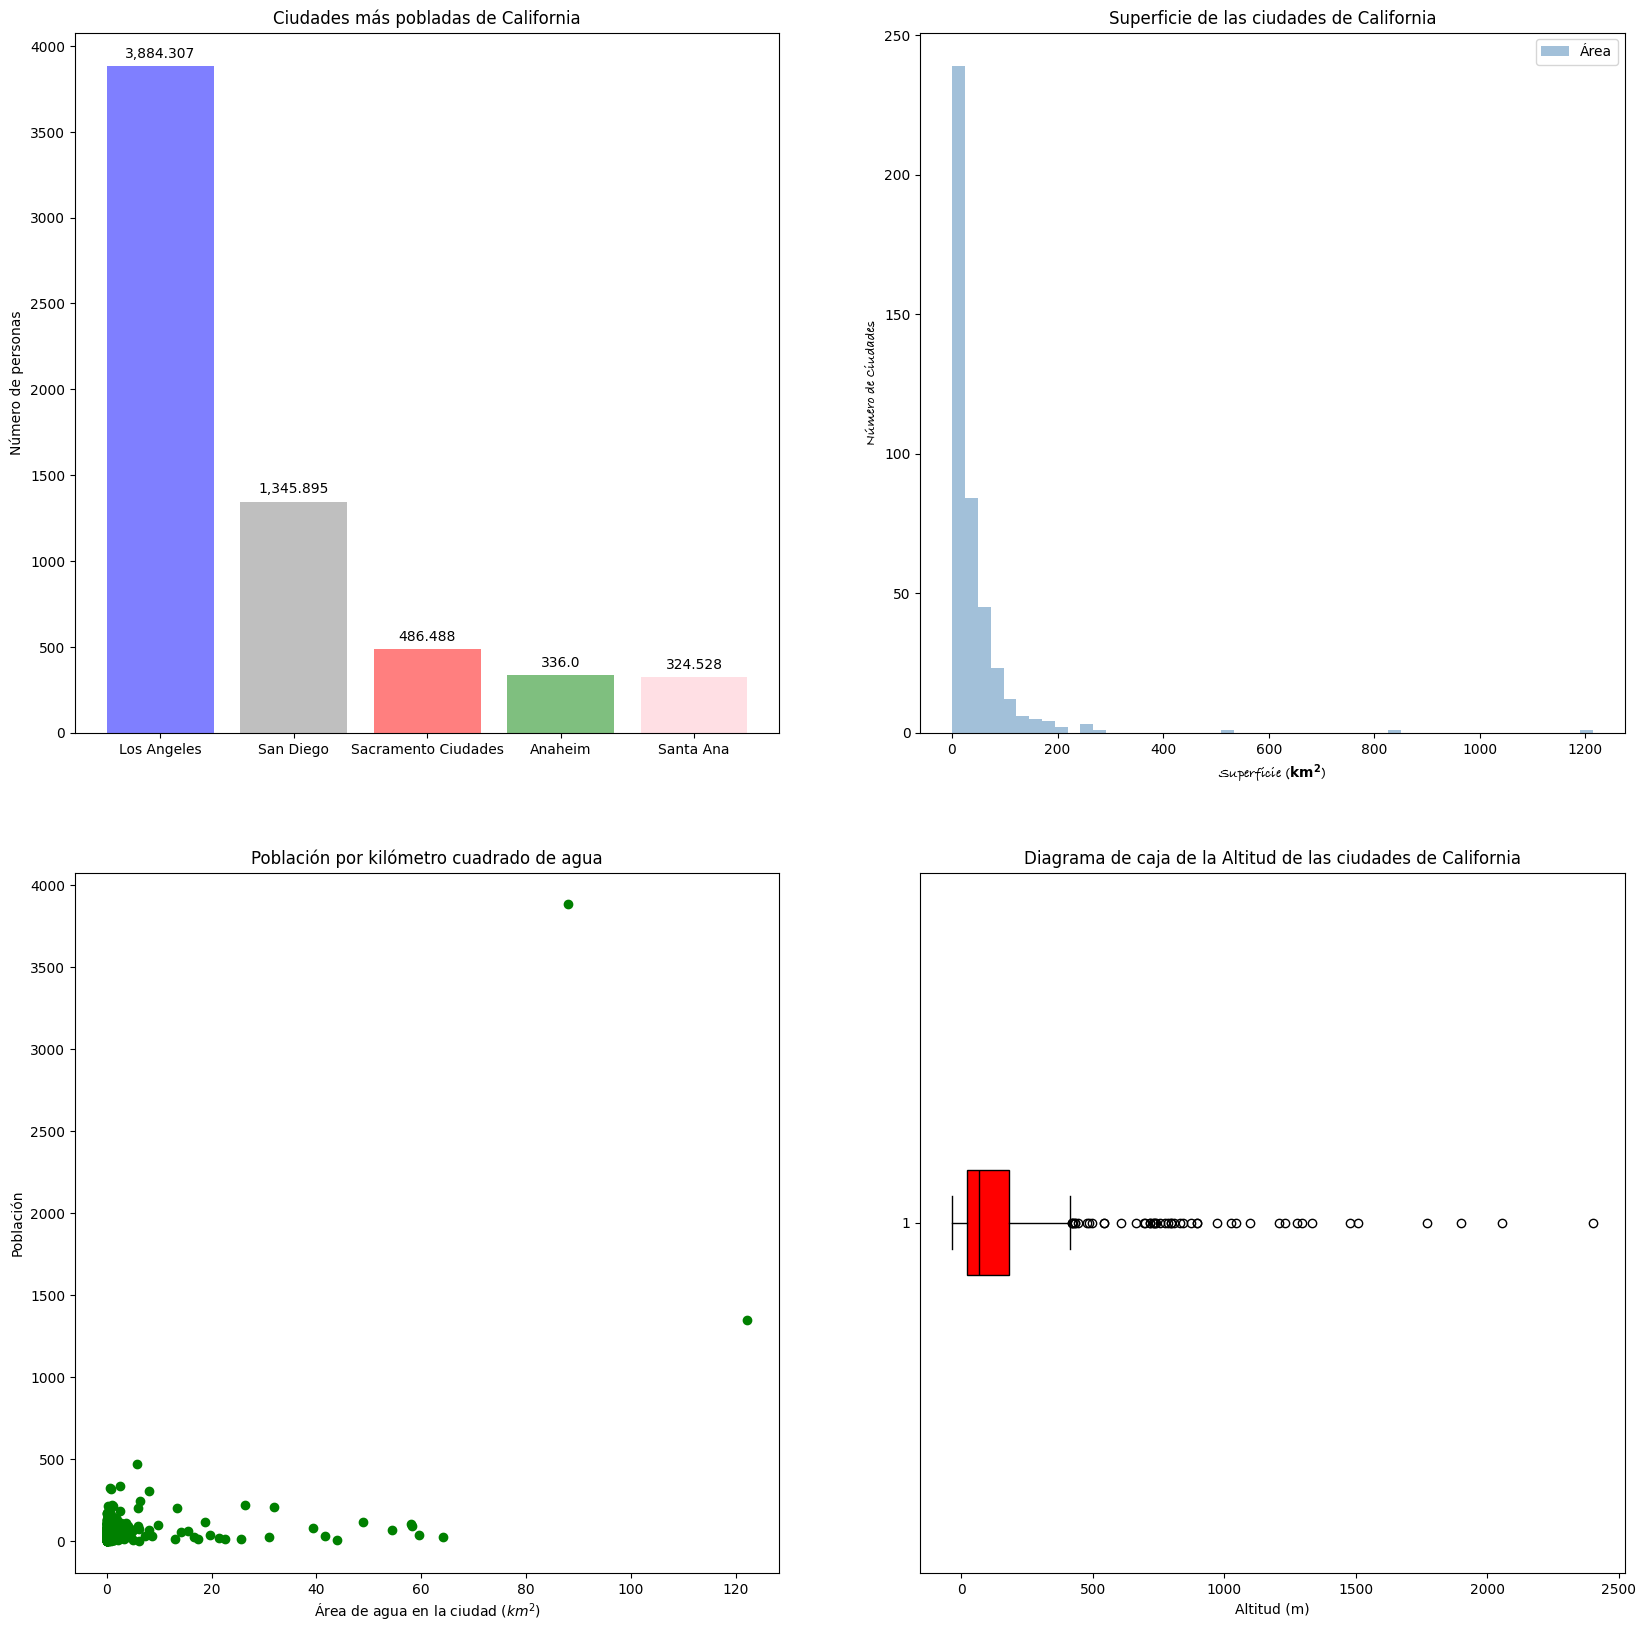

In [305]:
fig, ax =plt.subplots(2,2,figsize = (20,20))

ciudades = ['Los Angeles', 'San Diego', 'Sacramento Ciudades', 'Anaheim', 'Santa Ana']
poblaciones = [3884307/1000, 1345895/1000, 486488/1000, 336000/1000, 324528/1000]


# Gráfico de barras
ax[0, 0].bar(ciudades, poblaciones, color=['Blue', 'gray', 'red', 'green', 'pink'],alpha = 0.5)
for i, v in enumerate(poblaciones):
    ax[0, 0].text(i, (v+ 50), f'{v:,}', ha='center')
ax[0, 0].set_title('Ciudades más pobladas de California')
ax[0, 0].set_ylabel('Número de personas')


# Histograma
ax[0, 1].hist(df_CasasCAlifornia["area_land_km2"], bins=50, color='steelblue', alpha=0.5, label='Área')
ax[0, 1].set_title('Superficie de las ciudades de California')
ax[0, 1].set_xlabel('Superficie ($\mathbf{km^2}$)', family="Bradley Hand")
ax[0, 1].set_ylabel('Número de Ciudades', family="Bradley Hand")
ax[0, 1].legend()


# Boxplot
ax[1, 1].boxplot(df_CasasCAlifornia["elevation_m"], patch_artist=True, boxprops=dict(facecolor='red'), vert = False, medianprops = dict(color = "black"))
ax[1, 1].set_title('Diagrama de caja de la Altitud de las ciudades de California')
ax[1, 1].set_xlabel('Altitud (m)')

# Gráfico de dispersión
ax[1, 0].scatter(df_CasasCAlifornia["area_water_km2"], df_CasasCAlifornia["population_total"]/1000, color='green')
ax[1, 0].set_title('Población por kilómetro cuadrado de agua')
ax[1, 0].set_xlabel('Área de agua en la ciudad ($km^2$)')
ax[1, 0].set_ylabel('Población')
ax[1, 0].set_xlim([df_CasasCAlifornia["area_water_km2"].min()-10, 120, 20])

# Ajustar el layout
plt.tight_layout()



### #1.3

Graba la figura en un archivo y sube el archivo a tu repo personal también.

In [306]:
fig.savefig('./practica_obligatoria_DS_JGS.png')